# HR Analytics Challenge

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Reading the train and test files


test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

In [20]:
print ('The Shape of Test =' , test.shape)
print ('The Shape of Train =' , df.shape)

The Shape of Test = (23490, 13)
The Shape of Train = (54808, 14)


In [21]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [22]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [25]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [27]:
#checking for null values
df.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [28]:
#checking the number of null values
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

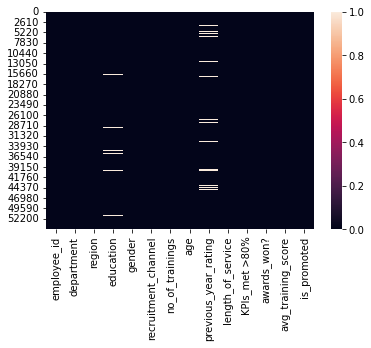

In [11]:
sns.heatmap(df.isna())

# Data Preprocessing

In [29]:
# Filling Missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)


print ('The number os missing values after filling =',train.isnull().sum().sum())

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)


print ('The number os missing values after filling =',test.isnull().sum().sum())

The number os missing values after filling = 0
The number os missing values after filling = 0


In [30]:
# Removing the id column

train = train.drop(['employee_id'], axis = 1)

In [31]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

In [32]:
# Defining main splits

# we now apply one hot encoding on the test 

test = pd.get_dummies(test)

In [33]:
# Splitting the train set into dependent and independent sets

x = train.drop ('is_promoted' , axis = 1 )
Y = train['is_promoted']

print("Shape of x:", x.shape)
print("Shape of Y:", Y.shape)

Shape of x: (54808, 12)
Shape of Y: (54808,)


In [34]:
# Encoding for the train now

x = pd.get_dummies(x)

In [35]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, Y_train, Y_valid = train_test_split(x,Y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_valid: ", Y_valid.shape)

Shape of x_train:  (43846, 58)
Shape of x_valid:  (10962, 58)
Shape of Y_train:  (43846,)
Shape of Y_valid:  (10962,)


In [36]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(test)
x_valid = sc.transform(x_valid)

# Modelling

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

rf = RandomForestClassifier()
rf.fit(x_train, Y_train)

rf_pred = rf.predict(x_test)

print("Training Accuracy :", rf.score(x_train, Y_train))


print("Validation Accuracy :", rf.score(x_valid, Y_valid))

Training Accuracy : 0.9997263148291748
Validation Accuracy : 0.9355956942163839


In [38]:
# Using Catboost

!pip install catboost

In [39]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, Y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", cbc.score(x_train, Y_train))

print("Validation Accuracy :", cbc.score(x_valid, Y_valid))

0:	learn: 0.6860990	total: 161ms	remaining: 2m 41s
1:	learn: 0.6805387	total: 180ms	remaining: 1m 29s
2:	learn: 0.6757939	total: 199ms	remaining: 1m 6s
3:	learn: 0.6708179	total: 221ms	remaining: 55s
4:	learn: 0.6663771	total: 242ms	remaining: 48.1s
5:	learn: 0.6619322	total: 263ms	remaining: 43.6s
6:	learn: 0.6579334	total: 286ms	remaining: 40.6s
7:	learn: 0.6536495	total: 321ms	remaining: 39.8s
8:	learn: 0.6491287	total: 345ms	remaining: 38s
9:	learn: 0.6442085	total: 375ms	remaining: 37.2s
10:	learn: 0.6403568	total: 444ms	remaining: 39.9s
11:	learn: 0.6362819	total: 470ms	remaining: 38.7s
12:	learn: 0.6325027	total: 496ms	remaining: 37.7s
13:	learn: 0.6283167	total: 514ms	remaining: 36.2s
14:	learn: 0.6236991	total: 539ms	remaining: 35.4s
15:	learn: 0.6194177	total: 568ms	remaining: 34.9s
16:	learn: 0.6152846	total: 600ms	remaining: 34.7s
17:	learn: 0.6109651	total: 624ms	remaining: 34.1s
18:	learn: 0.6068141	total: 649ms	remaining: 33.5s
19:	learn: 0.6025447	total: 671ms	remaining

161:	learn: 0.3140071	total: 4.34s	remaining: 22.4s
162:	learn: 0.3132022	total: 4.36s	remaining: 22.4s
163:	learn: 0.3118246	total: 4.38s	remaining: 22.4s
164:	learn: 0.3111465	total: 4.4s	remaining: 22.3s
165:	learn: 0.3104507	total: 4.43s	remaining: 22.2s
166:	learn: 0.3096137	total: 4.45s	remaining: 22.2s
167:	learn: 0.3088691	total: 4.47s	remaining: 22.1s
168:	learn: 0.3080542	total: 4.49s	remaining: 22.1s
169:	learn: 0.3074090	total: 4.51s	remaining: 22s
170:	learn: 0.3065804	total: 4.55s	remaining: 22s
171:	learn: 0.3059839	total: 4.57s	remaining: 22s
172:	learn: 0.3053960	total: 4.59s	remaining: 21.9s
173:	learn: 0.3044202	total: 4.61s	remaining: 21.9s
174:	learn: 0.3031973	total: 4.63s	remaining: 21.8s
175:	learn: 0.3024343	total: 4.65s	remaining: 21.8s
176:	learn: 0.3015149	total: 4.67s	remaining: 21.7s
177:	learn: 0.3007406	total: 4.69s	remaining: 21.7s
178:	learn: 0.3001903	total: 4.73s	remaining: 21.7s
179:	learn: 0.2993077	total: 4.8s	remaining: 21.9s
180:	learn: 0.297970

322:	learn: 0.2317852	total: 8.8s	remaining: 18.5s
323:	learn: 0.2316436	total: 8.84s	remaining: 18.4s
324:	learn: 0.2311991	total: 8.89s	remaining: 18.5s
325:	learn: 0.2308336	total: 8.91s	remaining: 18.4s
326:	learn: 0.2305642	total: 8.94s	remaining: 18.4s
327:	learn: 0.2303555	total: 8.96s	remaining: 18.4s
328:	learn: 0.2297055	total: 8.99s	remaining: 18.3s
329:	learn: 0.2291890	total: 9.02s	remaining: 18.3s
330:	learn: 0.2290418	total: 9.05s	remaining: 18.3s
331:	learn: 0.2289146	total: 9.07s	remaining: 18.3s
332:	learn: 0.2287069	total: 9.1s	remaining: 18.2s
333:	learn: 0.2284105	total: 9.13s	remaining: 18.2s
334:	learn: 0.2282169	total: 9.15s	remaining: 18.2s
335:	learn: 0.2281098	total: 9.18s	remaining: 18.1s
336:	learn: 0.2278845	total: 9.23s	remaining: 18.2s
337:	learn: 0.2276954	total: 9.26s	remaining: 18.1s
338:	learn: 0.2275044	total: 9.28s	remaining: 18.1s
339:	learn: 0.2272922	total: 9.31s	remaining: 18.1s
340:	learn: 0.2270994	total: 9.33s	remaining: 18s
341:	learn: 0.22

483:	learn: 0.2022709	total: 12.6s	remaining: 13.4s
484:	learn: 0.2022108	total: 12.6s	remaining: 13.4s
485:	learn: 0.2021755	total: 12.6s	remaining: 13.4s
486:	learn: 0.2019816	total: 12.7s	remaining: 13.3s
487:	learn: 0.2019480	total: 12.7s	remaining: 13.3s
488:	learn: 0.2017990	total: 12.7s	remaining: 13.3s
489:	learn: 0.2017703	total: 12.7s	remaining: 13.3s
490:	learn: 0.2016413	total: 12.8s	remaining: 13.2s
491:	learn: 0.2015481	total: 12.8s	remaining: 13.2s
492:	learn: 0.2014783	total: 12.8s	remaining: 13.2s
493:	learn: 0.2013729	total: 12.8s	remaining: 13.1s
494:	learn: 0.2012180	total: 12.9s	remaining: 13.1s
495:	learn: 0.2011524	total: 12.9s	remaining: 13.1s
496:	learn: 0.2010509	total: 12.9s	remaining: 13.1s
497:	learn: 0.2009201	total: 12.9s	remaining: 13s
498:	learn: 0.2008338	total: 13s	remaining: 13s
499:	learn: 0.2007043	total: 13s	remaining: 13s
500:	learn: 0.2005450	total: 13s	remaining: 13s
501:	learn: 0.2004577	total: 13s	remaining: 12.9s
502:	learn: 0.2004060	total:

648:	learn: 0.1888735	total: 16.3s	remaining: 8.79s
649:	learn: 0.1888224	total: 16.3s	remaining: 8.77s
650:	learn: 0.1887496	total: 16.3s	remaining: 8.74s
651:	learn: 0.1887309	total: 16.3s	remaining: 8.72s
652:	learn: 0.1886607	total: 16.4s	remaining: 8.69s
653:	learn: 0.1886157	total: 16.4s	remaining: 8.67s
654:	learn: 0.1885320	total: 16.4s	remaining: 8.65s
655:	learn: 0.1885118	total: 16.4s	remaining: 8.63s
656:	learn: 0.1884623	total: 16.5s	remaining: 8.61s
657:	learn: 0.1884488	total: 16.5s	remaining: 8.58s
658:	learn: 0.1884165	total: 16.5s	remaining: 8.56s
659:	learn: 0.1883189	total: 16.6s	remaining: 8.56s
660:	learn: 0.1883004	total: 16.7s	remaining: 8.55s
661:	learn: 0.1882773	total: 16.7s	remaining: 8.53s
662:	learn: 0.1882476	total: 16.7s	remaining: 8.5s
663:	learn: 0.1882261	total: 16.7s	remaining: 8.47s
664:	learn: 0.1881844	total: 16.8s	remaining: 8.44s
665:	learn: 0.1881595	total: 16.8s	remaining: 8.42s
666:	learn: 0.1881133	total: 16.8s	remaining: 8.39s
667:	learn: 0

811:	learn: 0.1817516	total: 20.7s	remaining: 4.79s
812:	learn: 0.1816845	total: 20.7s	remaining: 4.77s
813:	learn: 0.1816671	total: 20.8s	remaining: 4.74s
814:	learn: 0.1816541	total: 20.8s	remaining: 4.71s
815:	learn: 0.1816182	total: 20.8s	remaining: 4.69s
816:	learn: 0.1815858	total: 20.8s	remaining: 4.66s
817:	learn: 0.1815361	total: 20.9s	remaining: 4.64s
818:	learn: 0.1815048	total: 20.9s	remaining: 4.61s
819:	learn: 0.1814872	total: 20.9s	remaining: 4.59s
820:	learn: 0.1814689	total: 20.9s	remaining: 4.56s
821:	learn: 0.1814525	total: 21s	remaining: 4.54s
822:	learn: 0.1814302	total: 21s	remaining: 4.51s
823:	learn: 0.1813691	total: 21s	remaining: 4.49s
824:	learn: 0.1813541	total: 21s	remaining: 4.46s
825:	learn: 0.1813166	total: 21.1s	remaining: 4.44s
826:	learn: 0.1812893	total: 21.1s	remaining: 4.41s
827:	learn: 0.1812713	total: 21.1s	remaining: 4.39s
828:	learn: 0.1812561	total: 21.2s	remaining: 4.37s
829:	learn: 0.1811947	total: 21.2s	remaining: 4.34s
830:	learn: 0.181156

972:	learn: 0.1770168	total: 25s	remaining: 695ms
973:	learn: 0.1769813	total: 25.1s	remaining: 669ms
974:	learn: 0.1769488	total: 25.1s	remaining: 643ms
975:	learn: 0.1769028	total: 25.1s	remaining: 618ms
976:	learn: 0.1768860	total: 25.1s	remaining: 592ms
977:	learn: 0.1768754	total: 25.2s	remaining: 567ms
978:	learn: 0.1768493	total: 25.2s	remaining: 541ms
979:	learn: 0.1768083	total: 25.3s	remaining: 516ms
980:	learn: 0.1768001	total: 25.3s	remaining: 490ms
981:	learn: 0.1767697	total: 25.3s	remaining: 465ms
982:	learn: 0.1767410	total: 25.4s	remaining: 439ms
983:	learn: 0.1767156	total: 25.4s	remaining: 413ms
984:	learn: 0.1766641	total: 25.4s	remaining: 387ms
985:	learn: 0.1765973	total: 25.4s	remaining: 361ms
986:	learn: 0.1765636	total: 25.5s	remaining: 335ms
987:	learn: 0.1765316	total: 25.5s	remaining: 310ms
988:	learn: 0.1764793	total: 25.6s	remaining: 284ms
989:	learn: 0.1764677	total: 25.6s	remaining: 259ms
990:	learn: 0.1764229	total: 25.6s	remaining: 233ms
991:	learn: 0.

In [40]:
# Submission 

submission = pd.read_csv('sample_submission_M0L0uXE.csv')

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [53]:
# Submission of RF

sub_rf = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':rf_pred})

sub_rf.to_csv('submission_rf.csv', index = False)
# Submission of XGB

sub_xgb = pd.DataFrame({'employee_id',
                     'is_promoted'})

sub_xgb.to_csv('submission_xgb.csv', index = False)
# Submission of CatBoost

sub_cbc = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':cbc_pred})

sub_cbc.to_csv('submission_cbc.csv', index = False)

In [54]:
# Trying the score with pca on the same models


from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_valid_pca = pca.transform(x_valid)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

rf_pca = RandomForestClassifier()
rf_pca.fit(x_train_pca, Y_train)

rf_pred_pca = rf_pca.predict(x_test_pca)

print("Training Accuracy :", rf_pca.score(x_train_pca, Y_train))


print("Validation Accuracy :", rf_pca.score(x_valid_pca, Y_valid))

print ()

print("Training Accuracy without pca:", rf.score(x_train, Y_train))


print("Validation Accuracy without pca:", rf.score(x_valid, Y_valid))

Training Accuracy : 0.9997035077316061
Validation Accuracy : 0.9386060937785076

Training Accuracy without pca: 0.9997263148291748
Validation Accuracy without pca: 0.9355956942163839


In [57]:
!pip install xgboost

In [58]:
from xgboost.sklearn import XGBClassifier



xgb_pca = XGBClassifier()
xgb_pca.fit(x_train_pca, Y_train)

xgb_pred_pca = xgb_pca.predict(x_test_pca)

print("Training Accuracy :", xgb_pca.score(x_train_pca, Y_train))

print("Validation Accuracy :", xgb_pca.score(x_valid_pca, Y_valid))


print ()


#print("Training Accuracy without pca :", xgb.score(x_train, Y_train))

#print("Validation Accuracy without pca :", xgb.score(x_valid, Y_valid))

Training Accuracy : 0.9695297176481321
Validation Accuracy : 0.9402481299033023



In [59]:
# Submission of RF with PCA

sub_rf = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':rf_pred_pca})

sub_rf.to_csv('submission_rfpca.csv', index = False)

# Submission of XGB with PCA

sub_xgb = pd.DataFrame({'employee_id':emp_id,
                     'is_promoted':xgb_pred_pca})

sub_xgb.to_csv('submission_xgbpca.csv', index = False)